-24.846533
-18.32849
Pearson Correlation x: CountInCyl y: TotRmag Correlation : -0.5979562383230673 T-Test : 8.33998071570206e-139
Linear Regresion x: CountInCyl y: TotRmag slope : -0.41045843074719696 Intercept -21.3510147458489 Correlation -0.5979562383230675 Wald test 8.339980715698295e-139 0.014590463408215239
Pearson Correlation x: DistanceTo5nn y: TotRmag Correlation : 0.6859557979531186 T-Test : 1.3704293668430965e-198
Linear Regresion x: DistanceTo5nn y: TotRmag slope : 1.128668835495383 Intercept -21.856529289930744 Correlation 0.6859557979531185 Wald test 1.3704293668433048e-198 0.03174966052726207
Pearson Correlation x: SurfaceDensity y: TotRmag Correlation : -0.6905874320309211 T-Test : 2.472311779054742e-202
Linear Regresion x: SurfaceDensity y: TotRmag slope : -0.5680180643670191 Intercept -21.552163527036505 Correlation -0.6905874320309212 Wald test 2.4723117790538635e-202 0.015775439671255435
Pearson Correlation x: AGEDenPar y: TotRmag Correlation : -0.493067396816003 T

<Figure size 3600x4800 with 0 Axes>

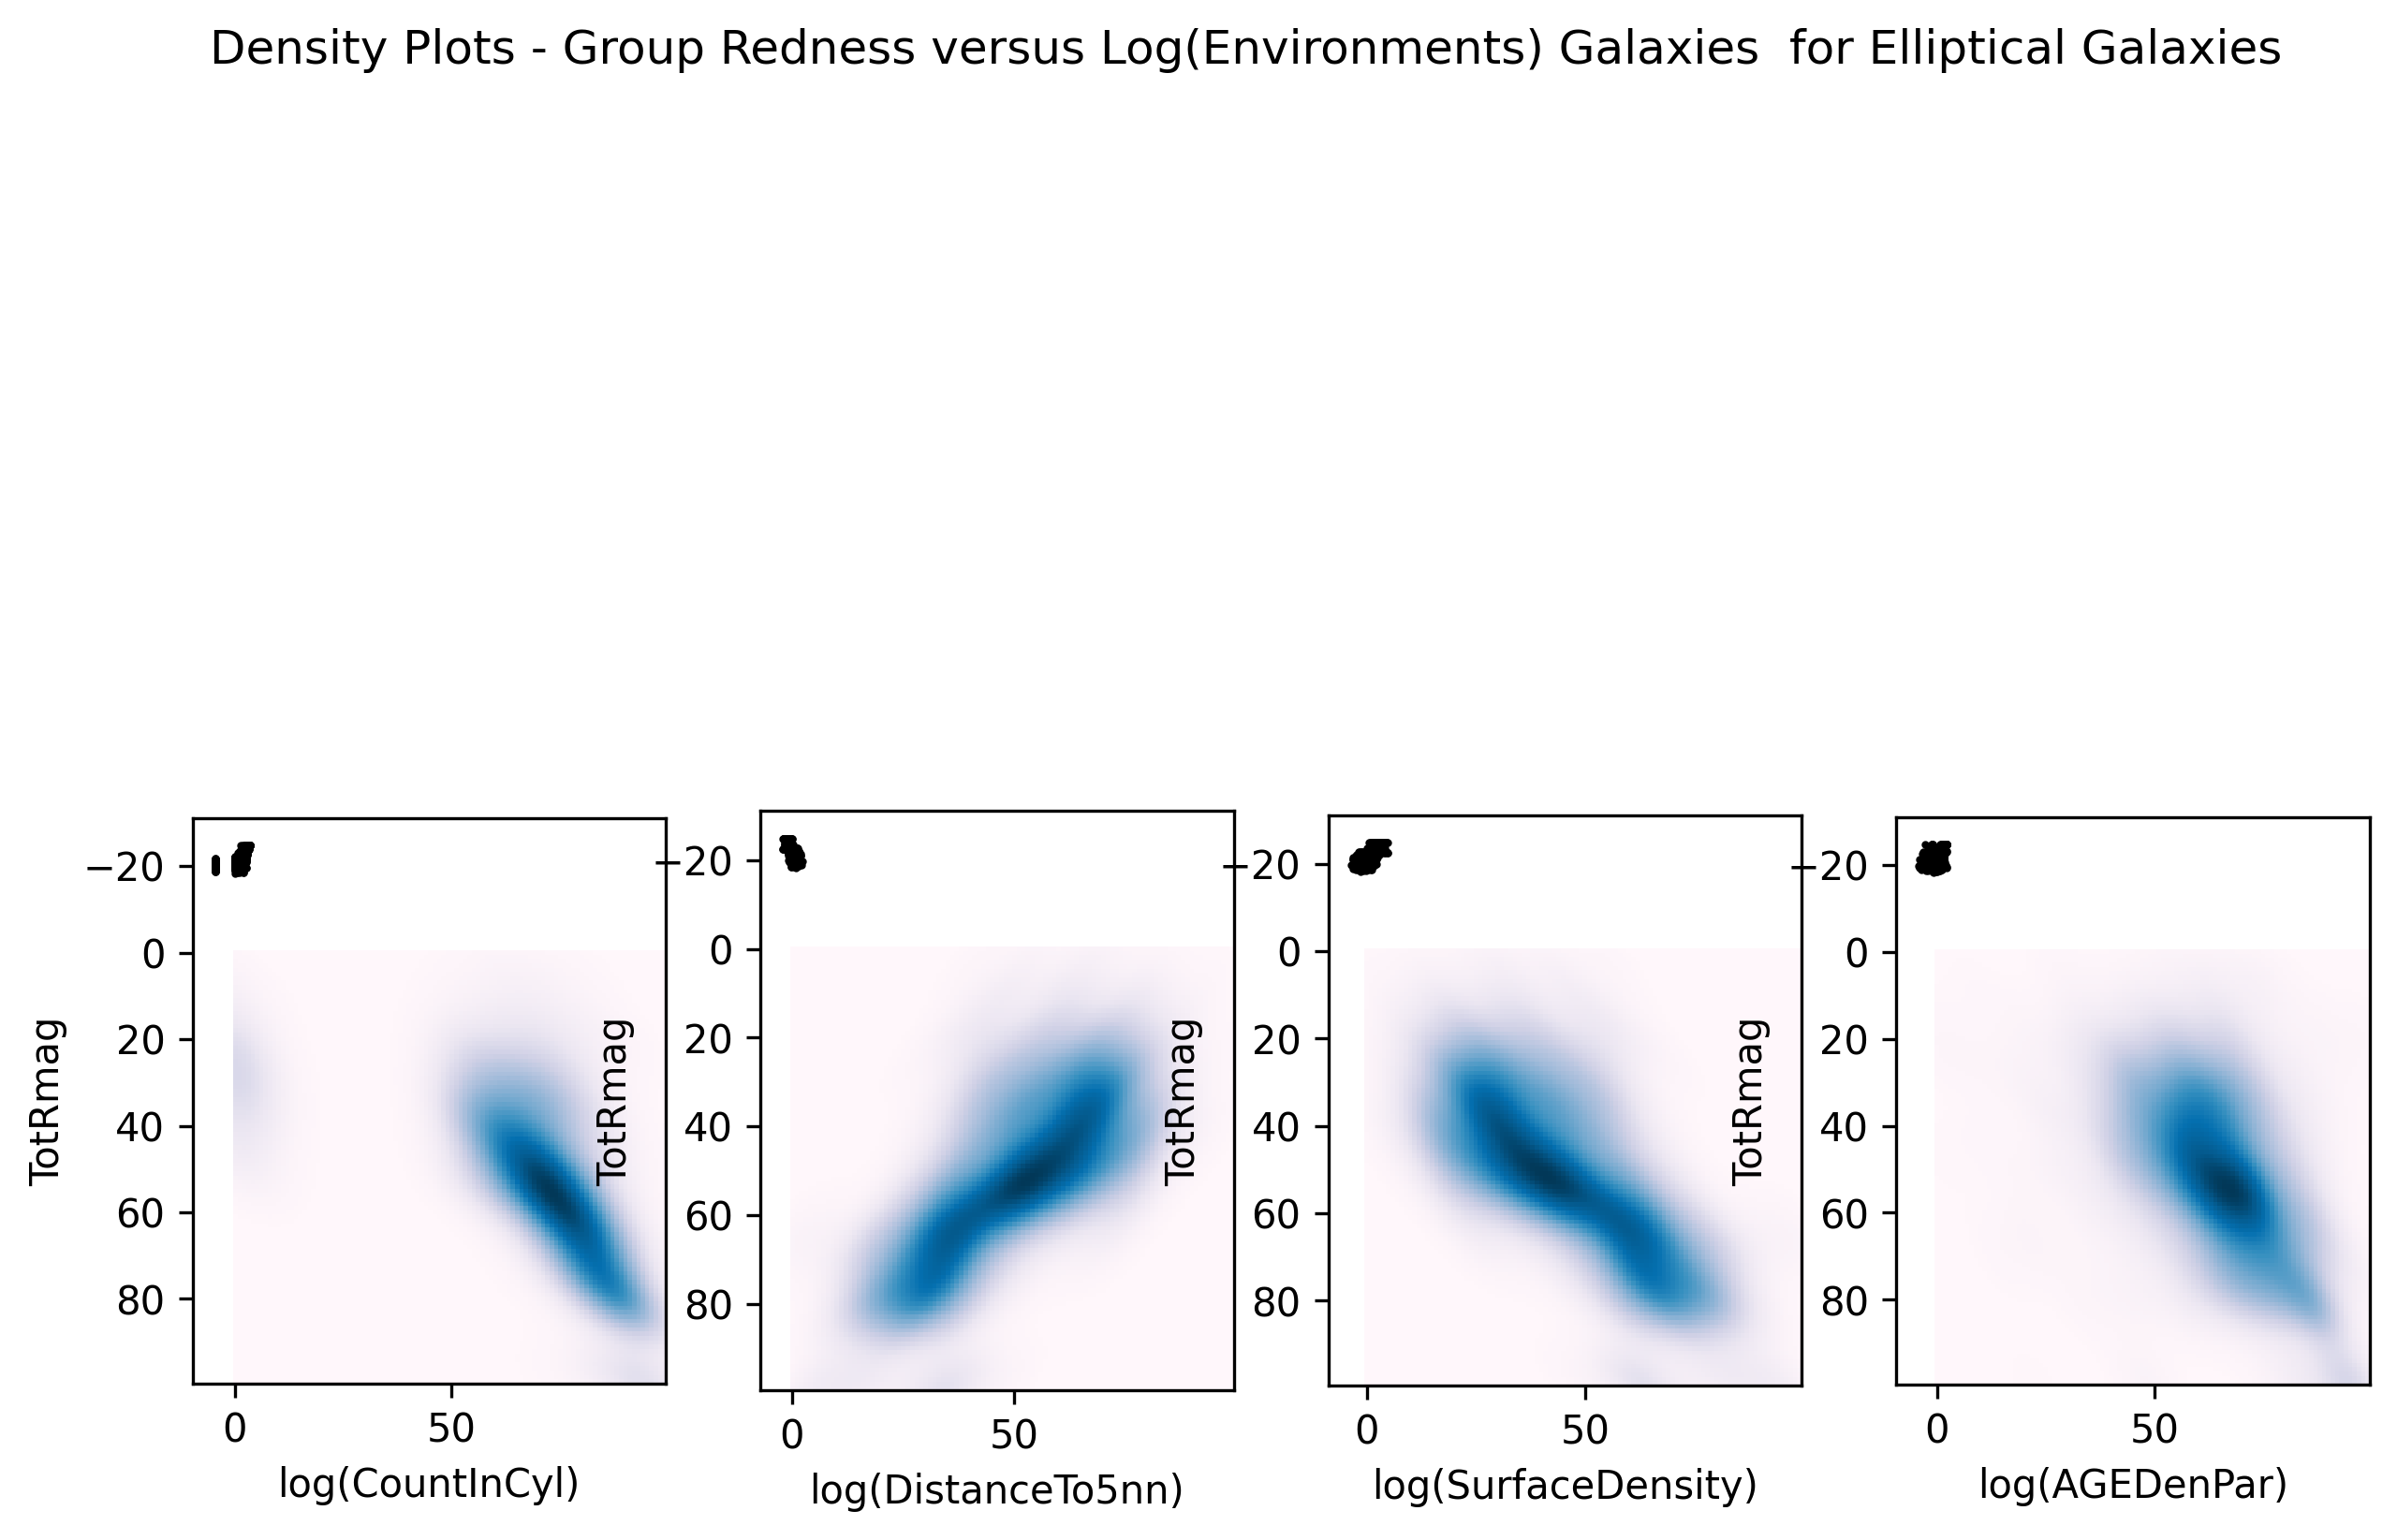

In [5]:
from astropy.table import Table, join
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

RErange = Table.read('../../GAMA_Data/Data+LocalGroup.fits')
## Clean Data
RErange = RErange[RErange['SurfaceDensityFlag'] == 0]
#RErange = RErange[RErange['SurfaceDensity'] < 50]
RErange = RErange[RErange['AGEDenParFlag'] == 0]
RErange = RErange[RErange['CountInCylFlag'] == 0]
RErange = RErange[RErange['uminusr']> 0.001]
## Red Ellipitcals
RErange = RErange[RErange['ELLIPTICAL_CODE'] == 1]

binCount = 100

yfield = 'TotRmag'

fig = plt.figure(figsize=(12, 16), dpi=300)

fig = plt.figure(figsize=(10, 8), dpi=300)
fig.suptitle('Density Plots - Group Redness versus Log(Environments) Galaxies  for Elliptical Galaxies')
xfields = ['CountInCyl','DistanceTo5nn','SurfaceDensity','AGEDenPar']
i = 1      
y = RErange[yfield]
ymin = min(y)
print(ymin)
ymax = max(y)
print(ymax)
for xfield in xfields :
    x = np.log(RErange[xfield]+0.01)
    xmin = min(x)
    xmax = max(x)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    ax = fig.add_subplot(1, len(xfields), i)
    ax.set_ylabel(yfield)
    ax.set_xlabel('log('+xfield+')') 
    i += 1           
    values = np.vstack([x, y])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)
    #ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r,extent=[xmin, xmax, ymin, ymax])
    #ax.imshow(np.rot90(Z), cmap='PuBu',extent=[xmin, xmax, ymin, ymax])
    ax.imshow(np.rot90(Z), cmap='PuBu')
    ax.plot(x, y, 'k.', markersize=2)
    #ax.set_xlim([xmin, xmax])
    #ax.set_ylim([ymin, ymax])
    r, p = stats.pearsonr(x,y)
    print(f"Pearson Correlation x: {xfield} y: {yfield} Correlation : {r} T-Test : {p}")
    m, c, r, p, se = stats.linregress(x,y)
    print(f"Linear Regresion x: {xfield} y: {yfield} slope : {m} Intercept {c} Correlation {r} Wald test {p} {se}")
    
plt.show()                            
#fig.legend(loc="upper right")
#plt.axis([0, 3, 0, 0.8])
fig.tight_layout()
#fig.savefig('../../ChartsPlots/GroupDensityDistanceLogEnvironments.png', dpi=300, bbox_inches='tight')
plt.show()